In [46]:
# Import TF and TF Hub libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [25]:
# Download the model from TF Hub.
model = hub.load('https://tfhub.dev/google/movenet/singlepose/lightning/4')
model = model.signatures['serving_default']


In [108]:
def getKeypoints(imagePath):
    # Load the input image.
    image = tf.io.read_file(imagePath)
    image = tf.compat.v1.image.decode_jpeg(image)
    image = tf.expand_dims(image, axis=0)

    # Resize and pad the image to keep the aspect ratio and fit the expected size.
    image = tf.cast(tf.image.resize_with_pad(image, 192, 192), dtype=tf.int32)

    # Run model inference.
    outputs = model(image)['output_0']

    columns = ['y','x']
    index   = np.array([
        'nose'          , 'left-eye'        , 'right-eye'       , 'left-ear'    , 
        'right-ear'     , 'left-shoulder'   , 'right-shoulder'  , 'left-elbow'  , 
        'right-elbow'   , 'left-wrist'      , 'right-wrist'     , 'left-hip'    , 
        'right-hip'     , 'left-knee'       , 'right-knee'      , 'left-ankle'  , 
        'right-ankle'   ,
    ])
    outputs = pd.DataFrame(
        columns= columns,
        index= index,
        data = outputs[0,0,:,0:2]
    )

    return outputs

def drawKeypoints(imagePath, keypoints):
    img = plt.imread(imagePath)
    
    keypoints *= img.shape[:2]
    keypoints  = keypoints.astype(int)

    plt.figure(figsize= [15,20])
    plt.imshow(img)
    plt.scatter(keypoints['x'], keypoints['y'])
    plt.plot(
        *keypoints.T[[
            'right-wrist', 'right-elbow', 'right-shoulder',
            'left-shoulder', 'left-elbow', 'left-wrist'
        ]].values[::-1]
    )
    plt.plot(
        *keypoints.T[[
            'right-ankle', 'right-knee', 'right-hip',
            'left-hip', 'left-knee', 'left-ankle'
        ]].values[::-1]
    )
    plt.plot(
        *keypoints.T[[
            'right-shoulder','right-hip', 'left-hip','left-shoulder'
        ]].values[::-1]
    )
    plt.show()

def saveKeypoints(outFileName, keypoints):
    keypoints.to_json(outFileName, orient= 'index')

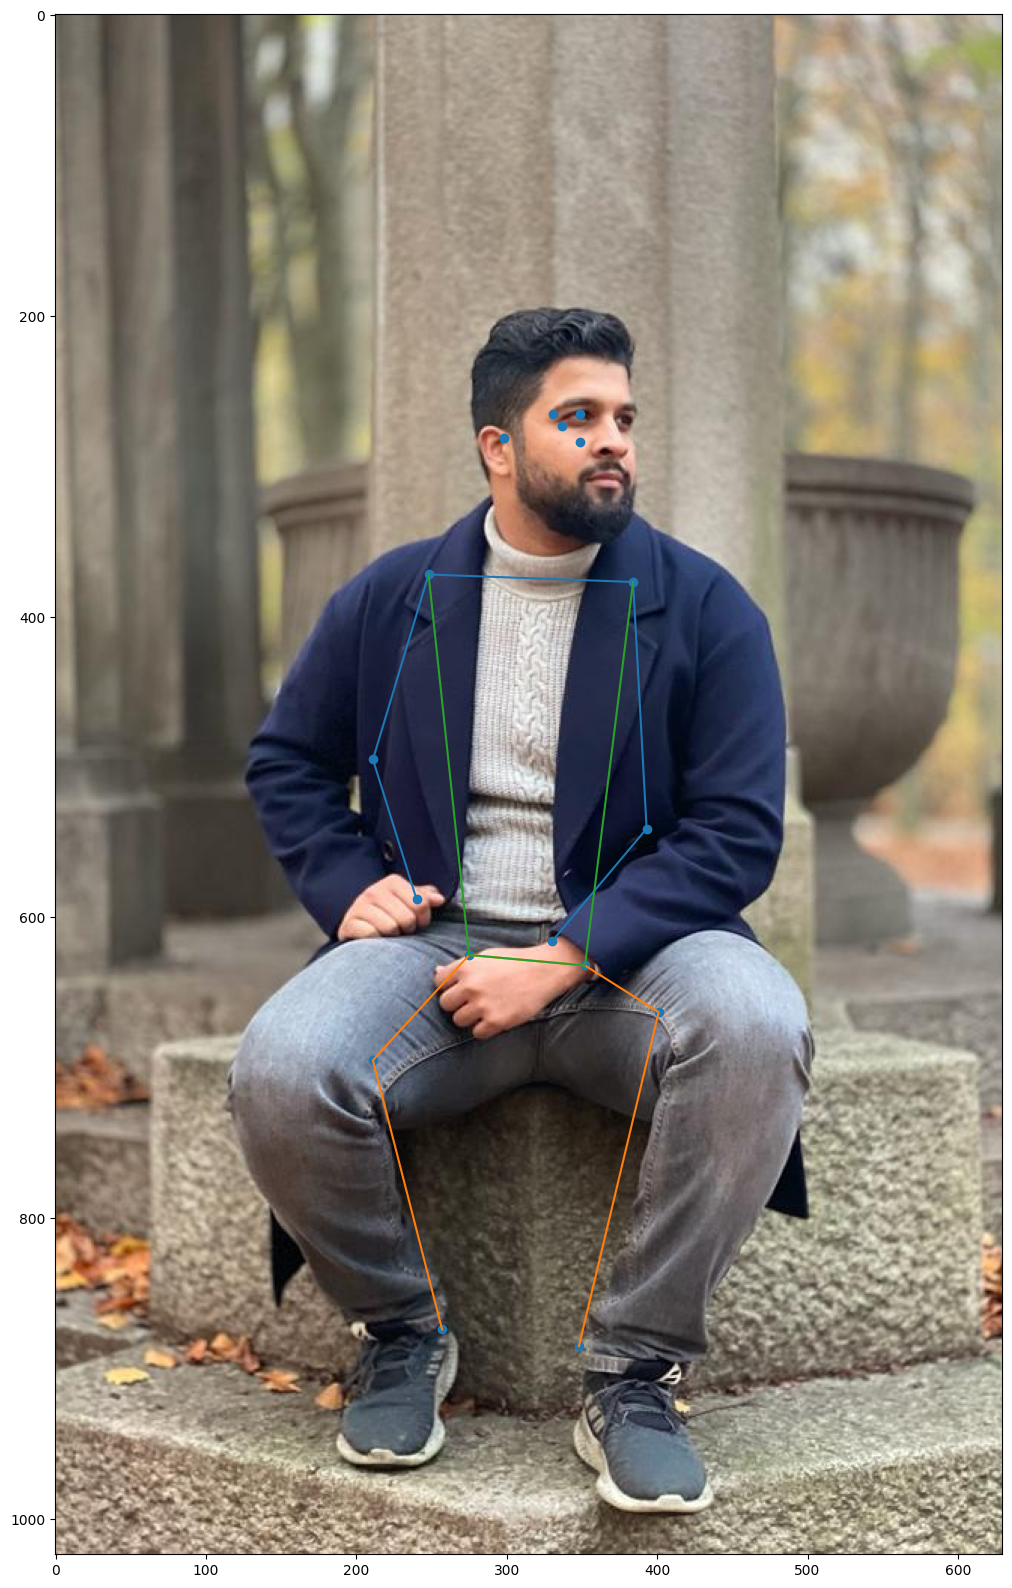

In [109]:
imagePath = 'images/1.jpeg'
keypoints = getKeypoints(imagePath= imagePath)

drawKeypoints(imagePath= imagePath, keypoints= keypoints)

outFileName = '1.json'
saveKeypoints(outFileName= outFileName, keypoints= keypoints)

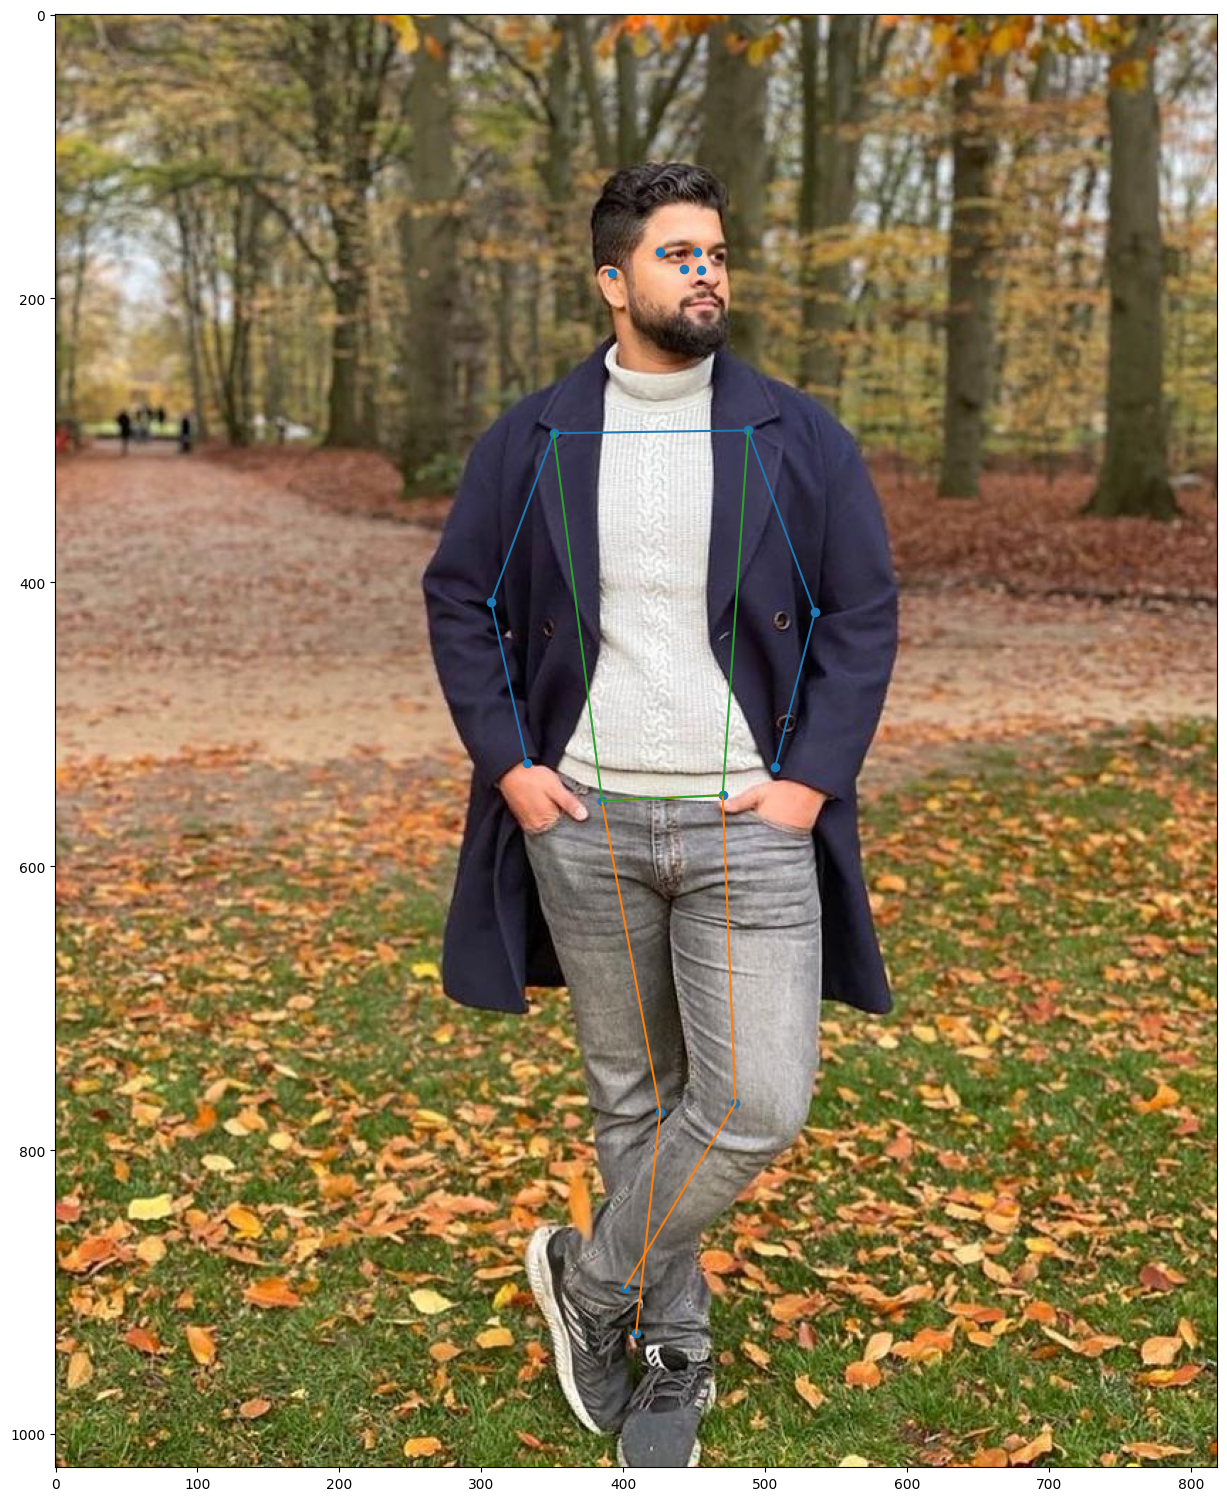

In [110]:
imagePath = 'images/2.jpeg'
keypoints = getKeypoints(imagePath= imagePath)

drawKeypoints(imagePath= imagePath, keypoints= keypoints)

outFileName = '2.json'
saveKeypoints(outFileName= outFileName, keypoints= keypoints)


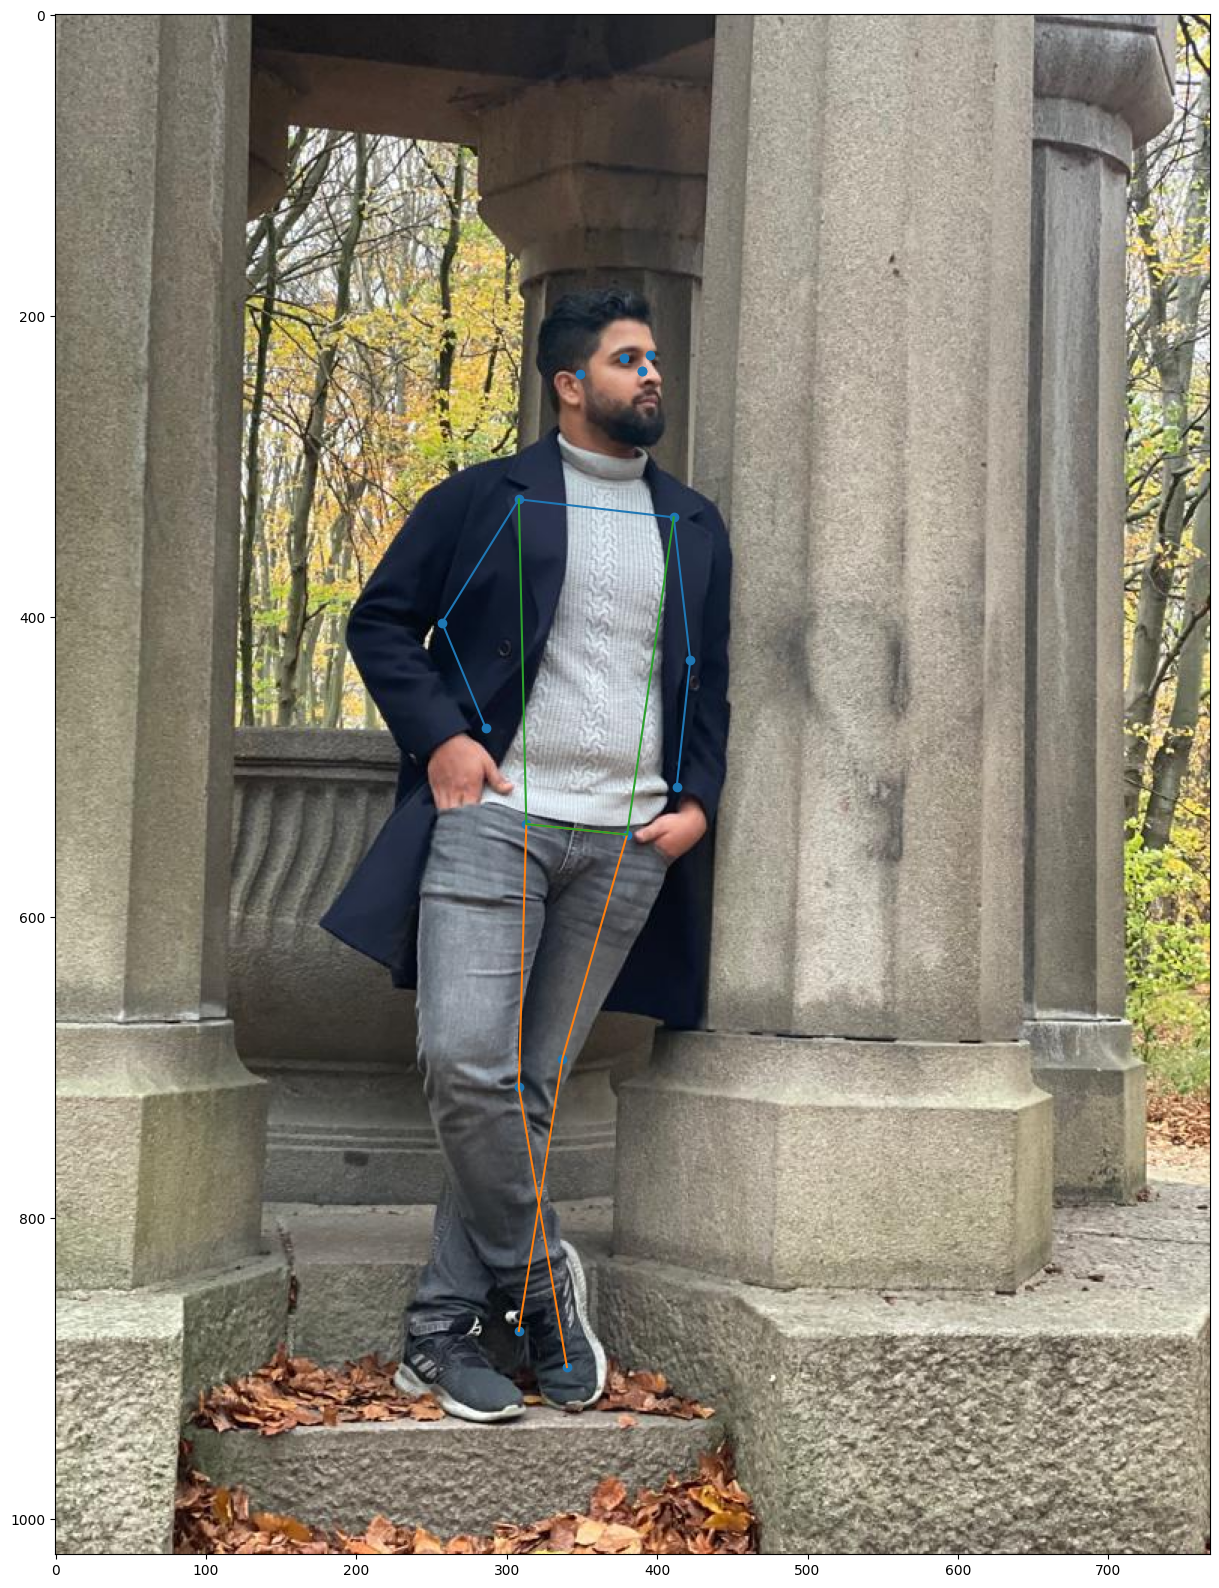

In [111]:
imagePath = 'images/3.jpeg'
keypoints = getKeypoints(imagePath= imagePath)

drawKeypoints(imagePath= imagePath, keypoints= keypoints)

outFileName = '3.json'
saveKeypoints(outFileName= outFileName, keypoints= keypoints)
